# Preprocessing

Data preprocessing is a technique which is used to transform the raw data into a useful and efficient format 

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_user=pd.read_csv('/content/drive/MyDrive/datascience/csvfiles/user.csv')

In [4]:
df_data=pd.read_csv('/content/drive/MyDrive/datascience/csvfiles/data.csv')

In [5]:
df_movie=pd.read_csv('/content/drive/MyDrive/datascience/csvfiles/movie.csv')

# Data Cleaning

# Removing Null Values

In [6]:
df_data

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [7]:
df_data.shape

(100000, 4)

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


no null values in the dataset data.csv

In [9]:
df_movie

,movie_id,movietitle,releasedate,IMDB,genres,members,season,year
0,1,Toy Story (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Toy%20Story%2...,"Action,Adventure,Comedy,Drama,Sci-Fi,Space",1324054,spring,1995
1,2,GoldenEye (1995),1-Jan-95,http://us.imdb.com/M/title-exact?GoldenEye%20(...,"Action,Drama,Mystery,Sci-Fi,Space",284827,summer,1995
2,3,Four Rooms (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Four%20Rooms%...,"Action,Sci-Fi,Adventure,Comedy,Drama,Shounen",578887,spring,1995
3,4,Get Shorty (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Get%20Shorty%...,"Action,Mystery,Police,Supernatural,Drama,Magic",96487,summer,1995
4,5,Copycat (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Copycat%20(1995),"Adventure,Fantasy,Shounen,Supernatural",13450,fall,1995
...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),6-Feb-98,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,"Action,Adventure,Fantasy,Mecha",1072,summer,1998
1678,1679,B. Monkey (1998),6-Feb-98,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,"Action,Adventure,Fantasy,Mecha",726,fall,1998
1679,1680,Sliding Doors (1998),1-Jan-98,http://us.imdb.com/Title?Sliding+Doors+(1998),"Parody,Adventure,Fantasy,Comedy,Mecha",702,spring,1998
1680,1681,You So Crazy (1994),1-Jan-94,http://us.imdb.com/M/title-exact?You%20So%20Cr...,"Comedy,School,Seinen,Slice of Life",67018,winter,1994


In [10]:
df_movie.shape

(1682, 8)

In [11]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     1682 non-null   int64 
 1   movietitle   1682 non-null   object
 2   releasedate  1681 non-null   object
 3   IMDB         1679 non-null   object
 4   genres       1682 non-null   object
 5   members      1682 non-null   int64 
 6   season       1682 non-null   object
 7   year         1682 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 105.2+ KB


In [12]:
df_movie.dropna(inplace=True)

In [13]:
df_movie.shape

(1679, 8)

In [14]:
df_movie.isnull().sum()

movie_id       0
movietitle     0
releasedate    0
IMDB           0
genres         0
members        0
season         0
year           0
dtype: int64

rows containing null values are dropped from the dataset movie.csv

we are not using fillna because the columns :- releasedate and IMDB cannot be filled using the column mean because these columns do not have numerical values

In [15]:
df_movie[['genre1','genre2','genre3','genre4','genre5','genre6']] = df_movie['genres'].str.split(',', 5,expand=True)
df_movie.drop(columns=['genres'],inplace=True)

There are various genres available for a single movie_id

Therefore we split the column "genres" into different 6 different columns each containing a single genre

In [16]:
df_movie

,movie_id,movietitle,releasedate,IMDB,members,season,year,genre1,genre2,genre3,genre4,genre5,genre6
0,1,Toy Story (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Toy%20Story%2...,1324054,spring,1995,Action,Adventure,Comedy,Drama,Sci-Fi,Space
1,2,GoldenEye (1995),1-Jan-95,http://us.imdb.com/M/title-exact?GoldenEye%20(...,284827,summer,1995,Action,Drama,Mystery,Sci-Fi,Space,None
2,3,Four Rooms (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Four%20Rooms%...,578887,spring,1995,Action,Sci-Fi,Adventure,Comedy,Drama,Shounen
3,4,Get Shorty (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Get%20Shorty%...,96487,summer,1995,Action,Mystery,Police,Supernatural,Drama,Magic
4,5,Copycat (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Copycat%20(1995),13450,fall,1995,Adventure,Fantasy,Shounen,Supernatural,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),6-Feb-98,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,1072,summer,1998,Action,Adventure,Fantasy,Mecha,None,None
1678,1679,B. Monkey (1998),6-Feb-98,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,726,fall,1998,Action,Adventure,Fantasy,Mecha,None,None
1679,1680,Sliding Doors (1998),1-Jan-98,http://us.imdb.com/Title?Sliding+Doors+(1998),702,spring,1998,Parody,Adventure,Fantasy,Comedy,Mecha,None
1680,1681,You So Crazy (1994),1-Jan-94,http://us.imdb.com/M/title-exact?You%20So%20Cr...,67018,winter,1994,Comedy,School,Seinen,Slice of Life,None,None


In [17]:
df_movie.isnull().sum()

movie_id          0
movietitle        0
releasedate       0
IMDB              0
members           0
season            0
year              0
genre1            0
genre2           62
genre3          196
genre4          489
genre5          884
genre6         1280
dtype: int64

After splitting the column "genres" into 6 differnet columns , we have many null values in the columns :- genre2,genre3, genre4,genre5, genre6

This indicates that , not all rows have more than one genre 

Hence we are dropping these 5 columns


In [18]:
df_movie.drop(columns=['genre2','genre3','genre4','genre5','genre6','season','members'],inplace=True)

In [19]:
df_movie.head(3)

,movie_id,movietitle,releasedate,IMDB,year,genre1
0,1,Toy Story (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Toy%20Story%2...,1995,Action
1,2,GoldenEye (1995),1-Jan-95,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1995,Action
2,3,Four Rooms (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Four%20Rooms%...,1995,Action


In [20]:
df_movie = df_movie.rename(columns={'genre1':'genre'})

We have renamed the column for our convenience and easy usage in the  latter part of the project

In [21]:
df_movie.head()

,movie_id,movietitle,releasedate,IMDB,year,genre
0,1,Toy Story (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Toy%20Story%2...,1995,Action
1,2,GoldenEye (1995),1-Jan-95,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1995,Action
2,3,Four Rooms (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Four%20Rooms%...,1995,Action
3,4,Get Shorty (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1995,Action
4,5,Copycat (1995),1-Jan-95,http://us.imdb.com/M/title-exact?Copycat%20(1995),1995,Adventure


In [22]:
df_movie.drop(columns=['IMDB'],inplace=True)

In [23]:
df_movie.isnull().sum()

movie_id       0
movietitle     0
releasedate    0
year           0
genre          0
dtype: int64

All the null values have been removed successfully

In [24]:
df_user.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [25]:
df_user.shape

(943, 5)

In [26]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zipcode     943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


no null values in the dataset user.csv

# merging all the three datasets

In [27]:
df=df_data.merge(df_user,on="user_id",how="inner")

we have chosen the value of the how parameter to be "inner" , because we want to merge the datasets data.csv and user.csv with only those rows which contain same value in the column "user_id"

In [28]:
df.shape

(100000, 8)

In [29]:
df

,user_id,movie_id,rating,timestamp,age,gender,occupation,zipcode
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105
...,...,...,...,...,...,...,...,...
99995,941,919,5,875048887,20,M,student,97229
99996,941,273,3,875049038,20,M,student,97229
99997,941,1,5,875049144,20,M,student,97229
99998,941,294,4,875048532,20,M,student,97229


In [30]:
df.isnull().sum()

user_id       0
movie_id      0
rating        0
timestamp     0
age           0
gender        0
occupation    0
zipcode       0
dtype: int64

The merged dataset df does not contain any null values

In [31]:
df1=df.merge(df_movie,on="movie_id",how="inner")

we have chosen the value of the how parameter to be "inner" , because we want to merge the dataset movie.csv with the earlier merged dataframe df upon only those rows which contain same value in the column "movie__id"

In [32]:
df1.shape

(99987, 12)

In [33]:
df1

,user_id,movie_id,rating,timestamp,age,gender,occupation,zipcode,movietitle,releasedate,year,genre
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-97,1997,Comedy
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-97,1997,Comedy
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-97,1997,Comedy
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-97,1997,Comedy
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-97,1997,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...
99982,863,1679,3,889289491,17,M,student,60089,B. Monkey (1998),6-Feb-98,1998,Action
99983,863,1678,1,889289570,17,M,student,60089,Mat' i syn (1997),6-Feb-98,1998,Action
99984,863,1680,2,889289570,17,M,student,60089,Sliding Doors (1998),1-Jan-98,1998,Parody
99985,896,1681,3,887160722,28,M,writer,91505,You So Crazy (1994),1-Jan-94,1994,Comedy


In [34]:
df1.isnull().sum()

user_id        0
movie_id       0
rating         0
timestamp      0
age            0
gender         0
occupation     0
zipcode        0
movietitle     0
releasedate    0
year           0
genre          0
dtype: int64

The merged dataset df1 does not contain any null values

In [35]:
d=df1.copy()
dd=df1.copy()

2 copies of the final merged dataset have been made , so that they can be used for afterwards when necessary.

# Timestamp

In [36]:
from datetime import datetime, timezone

In [37]:
d['date(UTC)'] = d.apply(lambda row: datetime.fromtimestamp(row.timestamp).isoformat(), axis=1)
d

,user_id,movie_id,rating,timestamp,age,gender,occupation,zipcode,movietitle,releasedate,year,genre,date(UTC)
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-97,1997,Comedy,1997-12-04T15:55:49
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-97,1997,Comedy,1998-02-01T04:37:08
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-97,1997,Comedy,1997-12-28T00:16:10
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-97,1997,Comedy,1998-03-27T21:14:21
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-97,1997,Comedy,1997-10-01T23:06:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,863,1679,3,889289491,17,M,student,60089,B. Monkey (1998),6-Feb-98,1998,Action,1998-03-07T16:51:31
99983,863,1678,1,889289570,17,M,student,60089,Mat' i syn (1997),6-Feb-98,1998,Action,1998-03-07T16:52:50
99984,863,1680,2,889289570,17,M,student,60089,Sliding Doors (1998),1-Jan-98,1998,Parody,1998-03-07T16:52:50
99985,896,1681,3,887160722,28,M,writer,91505,You So Crazy (1994),1-Jan-94,1994,Comedy,1998-02-11T01:32:02


In [38]:
import matplotlib.pyplot as plt

In [39]:
from sklearn.ensemble import IsolationForest

In [40]:
iso = IsolationForest(contamination=0.2)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
l_enc=LabelEncoder()

In [43]:
d['gender']=l_enc.fit_transform(d['gender'])
d['occupation']=l_enc.fit_transform(d['occupation'])
d['genre']=l_enc.fit_transform(d['genre'])
d['date(UTC)']=l_enc.fit_transform(d['date(UTC)'])


In [44]:
d['zipcode']=l_enc.fit_transform(d['zipcode'])
d['movietitle']=l_enc.fit_transform(d['movietitle'])
d['releasedate']=l_enc.fit_transform(d['releasedate'])

In [45]:
d

,user_id,movie_id,rating,timestamp,age,gender,occupation,zipcode,movietitle,releasedate,year,genre,date(UTC)
0,196,242,3,881250949,49,1,20,378,824,158,1997,3,21294
1,305,242,5,886307828,23,1,14,689,824,158,1997,3,33210
2,6,242,4,883268170,42,1,6,758,824,158,1997,3,25500
3,234,242,4,891033261,60,1,15,706,824,158,1997,3,41779
4,63,242,3,875747190,31,1,11,529,824,158,1997,3,3941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,863,1679,3,889289491,17,1,18,425,108,218,1998,0,39602
99983,863,1678,1,889289570,17,1,18,425,950,218,1998,0,39604
99984,863,1680,2,889289570,17,1,18,425,1340,72,1998,20,39604
99985,896,1681,3,887160722,28,1,20,652,1655,68,1994,3,35074


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [47]:
scaler.fit(d)

MinMaxScaler()

In [48]:
DM=scaler.transform(d)

In [49]:
DM

array([[0.20700637, 0.14336704, 0.5       , ..., 0.98684211, 0.09090909,
        0.43215489],
       [0.32271762, 0.14336704, 1.        , ..., 0.98684211, 0.09090909,
        0.67398628],
       [0.00530786, 0.14336704, 0.75      , ..., 0.98684211, 0.09090909,
        0.51751431],
       ...,
       [0.91507431, 0.99881023, 0.25      , ..., 1.        , 0.60606061,
        0.80375046],
       [0.95010616, 0.99940512, 0.5       , ..., 0.94736842, 0.09090909,
        0.71181556],
       [0.97133758, 1.        , 0.5       , ..., 0.97368421, 0.        ,
        0.40548768]])

In [50]:
DF=pd.DataFrame(data=DM,columns=['user_id',	'movie_id',	'rating' ,	'timestamp' ,	'age' ,	'gender' ,	'occupation' ,	'zipcode' ,	'movietitle' ,	'releasedate' , 	'year' ,	'genre' ,	'date(UTC)'])

In [51]:
DF

,user_id,movie_id,rating,timestamp,age,gender,occupation,zipcode,movietitle,releasedate,year,genre,date(UTC)
0,0.207006,0.143367,0.50,0.351593,0.636364,1.0,1.00,0.476071,0.496386,0.666667,0.986842,0.090909,0.432155
1,0.322718,0.143367,1.00,0.624026,0.242424,1.0,0.70,0.867758,0.496386,0.666667,0.986842,0.090909,0.673986
2,0.005308,0.143367,0.75,0.460268,0.530303,1.0,0.30,0.954660,0.496386,0.666667,0.986842,0.090909,0.517514
3,0.247346,0.143367,0.75,0.878602,0.803030,1.0,0.75,0.889169,0.496386,0.666667,0.986842,0.090909,0.847891
4,0.065817,0.143367,0.50,0.055085,0.363636,1.0,0.55,0.666247,0.496386,0.666667,0.986842,0.090909,0.079981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,0.915074,0.998215,0.50,0.784659,0.151515,1.0,0.90,0.535264,0.065060,0.919831,1.000000,0.000000,0.803710
99983,0.915074,0.997620,0.00,0.784663,0.151515,1.0,0.90,0.535264,0.572289,0.919831,1.000000,0.000000,0.803750
99984,0.915074,0.998810,0.25,0.784663,0.151515,1.0,0.90,0.535264,0.807229,0.303797,1.000000,0.606061,0.803750
99985,0.950106,0.999405,0.50,0.669974,0.318182,1.0,1.00,0.821159,0.996988,0.286920,0.947368,0.090909,0.711816


In [52]:
yhat = iso.fit_predict(DF)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [53]:
mask = yhat != -1

In [54]:
print(mask)

[ True  True  True ... False  True False]


In [55]:
import array as arr

In [56]:
s=0
sm=0
for i in range(0, len(yhat)):
    if yhat[i]!=-1:
      s=s+1   
    elif yhat[i]==-1:
      sm=sm+1
print("No of rows that are not outliers =" ,s)
print("No of rows that are outliers =",sm)

No of rows that are not outliers = 79989
No of rows that are outliers = 19998


In [57]:
t=[]

In [58]:
for i in range(0, len(yhat)):
    if yhat[i]!=-1:
      t.append('trustful') 
    elif yhat[i]==-1:
      t.append('attacker')

In [59]:
df = pd.DataFrame(t,columns=['user_type'])
df

,user_type
0,trustful
1,trustful
2,trustful
3,trustful
4,trustful
...,...
99982,attacker
99983,attacker
99984,attacker
99985,trustful


In [60]:
D=pd.concat([DF,df],axis=1)

In [61]:
D

,user_id,movie_id,rating,timestamp,age,gender,occupation,zipcode,movietitle,releasedate,year,genre,date(UTC),user_type
0,0.207006,0.143367,0.50,0.351593,0.636364,1.0,1.00,0.476071,0.496386,0.666667,0.986842,0.090909,0.432155,trustful
1,0.322718,0.143367,1.00,0.624026,0.242424,1.0,0.70,0.867758,0.496386,0.666667,0.986842,0.090909,0.673986,trustful
2,0.005308,0.143367,0.75,0.460268,0.530303,1.0,0.30,0.954660,0.496386,0.666667,0.986842,0.090909,0.517514,trustful
3,0.247346,0.143367,0.75,0.878602,0.803030,1.0,0.75,0.889169,0.496386,0.666667,0.986842,0.090909,0.847891,trustful
4,0.065817,0.143367,0.50,0.055085,0.363636,1.0,0.55,0.666247,0.496386,0.666667,0.986842,0.090909,0.079981,trustful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,0.915074,0.998215,0.50,0.784659,0.151515,1.0,0.90,0.535264,0.065060,0.919831,1.000000,0.000000,0.803710,attacker
99983,0.915074,0.997620,0.00,0.784663,0.151515,1.0,0.90,0.535264,0.572289,0.919831,1.000000,0.000000,0.803750,attacker
99984,0.915074,0.998810,0.25,0.784663,0.151515,1.0,0.90,0.535264,0.807229,0.303797,1.000000,0.606061,0.803750,attacker
99985,0.950106,0.999405,0.50,0.669974,0.318182,1.0,1.00,0.821159,0.996988,0.286920,0.947368,0.090909,0.711816,trustful


In [62]:
D['user_type']=l_enc.fit_transform(D['user_type'])

In [63]:
D

,user_id,movie_id,rating,timestamp,age,gender,occupation,zipcode,movietitle,releasedate,year,genre,date(UTC),user_type
0,0.207006,0.143367,0.50,0.351593,0.636364,1.0,1.00,0.476071,0.496386,0.666667,0.986842,0.090909,0.432155,1
1,0.322718,0.143367,1.00,0.624026,0.242424,1.0,0.70,0.867758,0.496386,0.666667,0.986842,0.090909,0.673986,1
2,0.005308,0.143367,0.75,0.460268,0.530303,1.0,0.30,0.954660,0.496386,0.666667,0.986842,0.090909,0.517514,1
3,0.247346,0.143367,0.75,0.878602,0.803030,1.0,0.75,0.889169,0.496386,0.666667,0.986842,0.090909,0.847891,1
4,0.065817,0.143367,0.50,0.055085,0.363636,1.0,0.55,0.666247,0.496386,0.666667,0.986842,0.090909,0.079981,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,0.915074,0.998215,0.50,0.784659,0.151515,1.0,0.90,0.535264,0.065060,0.919831,1.000000,0.000000,0.803710,0
99983,0.915074,0.997620,0.00,0.784663,0.151515,1.0,0.90,0.535264,0.572289,0.919831,1.000000,0.000000,0.803750,0
99984,0.915074,0.998810,0.25,0.784663,0.151515,1.0,0.90,0.535264,0.807229,0.303797,1.000000,0.606061,0.803750,0
99985,0.950106,0.999405,0.50,0.669974,0.318182,1.0,1.00,0.821159,0.996988,0.286920,0.947368,0.090909,0.711816,1


In [64]:
D['user_type'].value_counts()

1    79989
0    19998
Name: user_type, dtype: int64

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

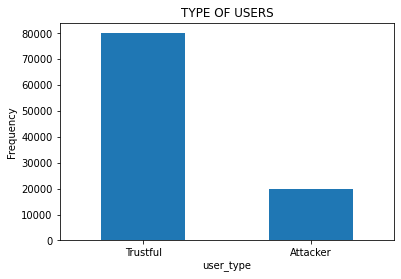

In [66]:
LABELS = ["Trustful", "Attacker"]
count_classes = pd.value_counts(D['user_type'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("TYPE OF USERS")
plt.xticks(range(2), LABELS)
plt.xlabel("user_type")
plt.ylabel("Frequency")

# Feature Selection - Pearson Correlation

In [67]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

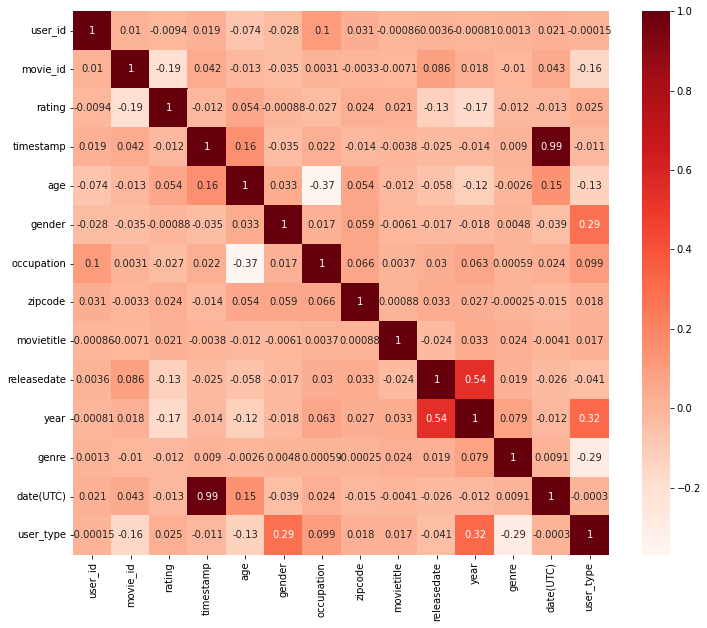

In [68]:
plt.figure(figsize=(12,10))
cor = D.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [69]:
cor_target = abs(cor["user_type"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

movie_id     0.156260
age          0.129698
gender       0.290257
year         0.315337
genre        0.288307
user_type    1.000000
Name: user_type, dtype: float64

In [70]:
D.drop(columns=['user_id'], axis=1)

,movie_id,rating,timestamp,age,gender,occupation,zipcode,movietitle,releasedate,year,genre,date(UTC),user_type
0,0.143367,0.50,0.351593,0.636364,1.0,1.00,0.476071,0.496386,0.666667,0.986842,0.090909,0.432155,1
1,0.143367,1.00,0.624026,0.242424,1.0,0.70,0.867758,0.496386,0.666667,0.986842,0.090909,0.673986,1
2,0.143367,0.75,0.460268,0.530303,1.0,0.30,0.954660,0.496386,0.666667,0.986842,0.090909,0.517514,1
3,0.143367,0.75,0.878602,0.803030,1.0,0.75,0.889169,0.496386,0.666667,0.986842,0.090909,0.847891,1
4,0.143367,0.50,0.055085,0.363636,1.0,0.55,0.666247,0.496386,0.666667,0.986842,0.090909,0.079981,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,0.998215,0.50,0.784659,0.151515,1.0,0.90,0.535264,0.065060,0.919831,1.000000,0.000000,0.803710,0
99983,0.997620,0.00,0.784663,0.151515,1.0,0.90,0.535264,0.572289,0.919831,1.000000,0.000000,0.803750,0
99984,0.998810,0.25,0.784663,0.151515,1.0,0.90,0.535264,0.807229,0.303797,1.000000,0.606061,0.803750,0
99985,0.999405,0.50,0.669974,0.318182,1.0,1.00,0.821159,0.996988,0.286920,0.947368,0.090909,0.711816,1


In [71]:
D.drop(columns=['timestamp','age','occupation','zipcode','movietitle','date(UTC)'],axis=1)

,user_id,movie_id,rating,gender,releasedate,year,genre,user_type
0,0.207006,0.143367,0.50,1.0,0.666667,0.986842,0.090909,1
1,0.322718,0.143367,1.00,1.0,0.666667,0.986842,0.090909,1
2,0.005308,0.143367,0.75,1.0,0.666667,0.986842,0.090909,1
3,0.247346,0.143367,0.75,1.0,0.666667,0.986842,0.090909,1
4,0.065817,0.143367,0.50,1.0,0.666667,0.986842,0.090909,1
...,...,...,...,...,...,...,...,...
99982,0.915074,0.998215,0.50,1.0,0.919831,1.000000,0.000000,0
99983,0.915074,0.997620,0.00,1.0,0.919831,1.000000,0.000000,0
99984,0.915074,0.998810,0.25,1.0,0.303797,1.000000,0.606061,0
99985,0.950106,0.999405,0.50,1.0,0.286920,0.947368,0.090909,1


In [93]:
x=D.iloc[:,[0,1,2,3,4,5,6]]
y=D['user_type']
print(D['user_type'])

0        1
1        1
2        1
3        1
4        1
        ..
99982    0
99983    0
99984    0
99985    1
99986    0
Name: user_type, Length: 99987, dtype: int64


In [73]:
x.shape

(99987, 7)

In [74]:
y.shape

(99987,)

In [75]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [77]:
x_train.shape

(79989, 7)

In [78]:
y_train.shape

(79989,)

In [79]:
x_test.shape


(19998, 7)

In [80]:
y_test.shape

(19998,)

In [85]:
print(x_train)

        user_id  movie_id  rating  timestamp       age  gender  occupation
63240  0.441614  0.325996    0.50   0.265232  0.303030     0.0        0.65
58652  0.903397  0.162403    0.50   0.878770  0.590909     1.0        0.00
53488  0.961783  0.549078    1.00   0.292778  0.272727     0.0        0.65
94392  0.500000  0.544319    1.00   0.973278  0.257576     1.0        0.90
88548  0.642251  0.367638    0.75   0.333901  0.318182     1.0        0.70
...         ...       ...     ...        ...       ...     ...         ...
21243  0.347134  0.256990    0.25   0.556136  0.666667     1.0        0.00
45891  0.096603  0.392029    0.75   0.050071  0.378788     1.0        0.25
42613  0.404459  0.089233    0.75   0.065840  0.575758     1.0        0.20
43567  0.853503  0.514575    0.00   0.376076  0.303030     0.0        0.65
68268  0.346072  0.293278    0.75   0.705621  0.227273     1.0        0.90

[79989 rows x 7 columns]


In [86]:
print(y_train)

63240    0.400504
58652    0.867758
53488    0.734257
94392    0.782116
88548    0.581864
           ...   
21243    0.618388
45891    0.732997
42613    0.099496
43567    0.129723
68268    0.022670
Name: zipcode, Length: 79989, dtype: float64


# Model Implementations

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.neural_network import MLPClassifier

# Linear - SVM( support Vector Machine )

In [97]:
lsvm = SVC(kernel = 'linear', random_state = 0)
lsvm.fit(x_train, y_train)
y_pred1 = lsvm.predict(x_test)
p1= precision_score(y_test, y_pred1)
r1=recall_score(y_test, y_pred1)
f1=f1_score(y_test, y_pred1)

In [99]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4028
           1       0.80      1.00      0.89     15970

    accuracy                           0.80     19998
   macro avg       0.40      0.50      0.44     19998
weighted avg       0.64      0.80      0.71     19998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test, y_pred1)

1.0

In [ ]:
r2_score(y_test, y_pred1)

1.0

#  Non - Linear SVM( support Vector Machine )

In [100]:
nlsvm = SVC(kernel = 'rbf', random_state = 1)
nlsvm.fit(x_train, y_train)
y_pred11 = nlsvm.predict(x_test)
p2= precision_score(y_test, y_pred11)
r2=recall_score(y_test, y_pred11)
f2=f1_score(y_test, y_pred11)

In [101]:
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.76      0.27      0.39      4028
           1       0.84      0.98      0.90     15970

    accuracy                           0.83     19998
   macro avg       0.80      0.62      0.65     19998
weighted avg       0.82      0.83      0.80     19998



In [ ]:
accuracy_score(y_test, y_pred11)

In [ ]:
r2_score(y_test, y_pred11)

# Naive Bayes Classification

In [102]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred2 = nb.predict(x_test)
p3= precision_score(y_test, y_pred2)
r3=recall_score(y_test, y_pred2)
f3=f1_score(y_test, y_pred2)

In [103]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.31      0.41      4028
           1       0.85      0.95      0.89     15970

    accuracy                           0.82     19998
   macro avg       0.72      0.63      0.65     19998
weighted avg       0.79      0.82      0.80     19998



In [106]:
accuracy_score(y_test, y_pred2)

0.8181818181818182

In [107]:
r2_score(y_test, y_pred2)

-0.13035812555691906



# Decision Tree

In [104]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred3 = dt.predict(x_test)
p4= precision_score(y_test, y_pred3)
r4=recall_score(y_test, y_pred3)
f4=f1_score(y_test, y_pred3)

In [105]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      4028
           1       0.90      0.90      0.90     15970

    accuracy                           0.84     19998
   macro avg       0.75      0.75      0.75     19998
weighted avg       0.84      0.84      0.84     19998



In [108]:
accuracy_score(y_test, y_pred3)

0.8401840184018402

In [109]:
r2_score(y_test, y_pred3)

0.006428886336657613

# K Nearest Neighbors Classifier

In [110]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
y_pred4 = n3.predict(x_test)
p5= precision_score(y_test, y_pred4)
r5=recall_score(y_test, y_pred4)
f5=f1_score(y_test, y_pred4)

In [111]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.57      0.45      0.50      4028
           1       0.87      0.92      0.89     15970

    accuracy                           0.82     19998
   macro avg       0.72      0.68      0.70     19998
weighted avg       0.81      0.82      0.81     19998



In [112]:
accuracy_score(y_test, y_pred4)

0.8206820682068207

In [113]:
r2_score(y_test, y_pred4)

-0.11481414693264891

In [114]:
n3 = KNeighborsClassifier(n_neighbors = 5)
n3.fit(x_train, y_train)
y_pred41 = n3.predict(x_test)

In [115]:
print(classification_report(y_test,y_pred41))

              precision    recall  f1-score   support

           0       0.61      0.43      0.50      4028
           1       0.87      0.93      0.90     15970

    accuracy                           0.83     19998
   macro avg       0.74      0.68      0.70     19998
weighted avg       0.81      0.83      0.82     19998



In [116]:
accuracy_score(y_test, y_pred41)

0.8302330233023303

In [117]:
r2_score(y_test, y_pred41)

-0.05543614858793733

In [118]:
n3 = KNeighborsClassifier(n_neighbors = 9)
n3.fit(x_train, y_train)
y_pred42 = n3.predict(x_test)

In [119]:
print(classification_report(y_test,y_pred42))

              precision    recall  f1-score   support

           0       0.65      0.40      0.49      4028
           1       0.86      0.95      0.90     15970

    accuracy                           0.83     19998
   macro avg       0.75      0.67      0.70     19998
weighted avg       0.82      0.83      0.82     19998



In [120]:
accuracy_score(y_test, y_pred42)

0.834983498349835

In [121]:
r2_score(y_test, y_pred42)

-0.02590258920182409

# Logistic Regression

In [122]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
p6= precision_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
r6=recall_score(y_test, y_pred)
f6=f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.58      0.15      0.24      4028
           1       0.82      0.97      0.89     15970

    accuracy                           0.81     19998
   macro avg       0.70      0.56      0.57     19998
weighted avg       0.77      0.81      0.76     19998



In [123]:
accuracy_score(y_test, y_pred)

0.8068806880688069

In [124]:
r2_score(y_test, y_pred)

-0.2006169089386196

# Random Forest

In [125]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
p7= precision_score(y_test, pred_rf)
r7=recall_score(y_test, pred_rf)
f7=f1_score(y_test,pred_rf)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.50      0.56      4028
           1       0.88      0.93      0.91     15970

    accuracy                           0.84     19998
   macro avg       0.76      0.71      0.73     19998
weighted avg       0.83      0.84      0.84     19998



In [126]:
accuracy_score(y_test, pred_rf)

0.8442844284428442

In [127]:
r2_score(y_test, pred_rf)

0.03192101128046043

# Stochastic Gradient Descent

In [139]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))

p9= precision_score(y_test, pred_sgd)
r9=recall_score(y_test, pred_sgd)
f9=f1_score(y_test, pred_sgd)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4028
           1       0.80      1.00      0.89     15970

    accuracy                           0.80     19998
   macro avg       0.40      0.50      0.44     19998
weighted avg       0.64      0.80      0.71     19998



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test, pred_sgd)

1.0

In [ ]:
r2_score(y_test, pred_sgd)

1.0

# Neural Networks

In [129]:
clf = MLPClassifier(random_state=1, max_iter=50).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [130]:
clf.predict_proba(x_test)

array([[0.14541442, 0.85458558],
       [0.05946205, 0.94053795],
       [0.02238471, 0.97761529],
       ...,
       [0.01706313, 0.98293687],
       [0.15701948, 0.84298052],
       [0.08074167, 0.91925833]])

In [131]:
y1=clf.predict(x_test)
y1
p8= precision_score(y_test, y1)
r8=recall_score(y_test, y1)
f8=f1_score(y_test, y1)

In [132]:
accuracy_score(y_test, y1)

0.8387338733873387

In [133]:
r2_score(y_test, y1)

-0.0025866212654190868

# Comparision

In [140]:
compare={'Modal Name':['linear SVM','Non-Linear SVM','Naive Bayes','Decision Tree','KNN','Logestic','Random Forest','Neural Networks','Gradient Descent'],
         'train accuracy':[lsvm.score(x_train,y_train),nlsvm.score(x_train,y_train),nb.score(x_train,y_train),dt.score(x_train,y_train),n3.score(x_train,y_train),classifier.score(x_train,y_train),rf.score(x_train,y_train),clf.score(x_train,y_train),sgd.score(x_train,y_train)],
         'Test accuracy':[lsvm.score(x_test,y_test),nlsvm.score(x_test,y_test),nb.score(x_test,y_test),dt.score(x_test,y_test),n3.score(x_test,y_test),classifier.score(x_test,y_test),rf.score(x_test,y_test),clf.score(x_test,y_test),sgd.score(x_test,y_test)],
         'precision':[p1,p2,p3,p4,p5,p6,p7,p8,p9],
         'recall':[r1,r2,r3,r4,r5,r6,r7,r8,r9],
         'f1_score':[f1,f2,f3,f4,f5,f6,f7,f8,f9]
}
com=pd.DataFrame(compare)
com         

,Modal Name,train accuracy,Test accuracy,precision,recall,f1_score
0,linear SVM,0.800348,0.798580,0.798580,1.000000,0.888012
1,Non-Linear SVM,0.836678,0.834783,0.840740,0.978460,0.904387
2,Naive Bayes,0.816250,0.818182,0.845335,0.945272,0.892515
3,Decision Tree,1.000000,0.840184,0.900138,0.899687,0.899912
4,KNN,0.859443,0.834983,0.867609,0.915091,0.890717
5,Logestic,0.806848,0.806881,0.819641,0.972073,0.889373
6,Random Forest,0.999987,0.844284,0.879861,0.932311,0.905327
7,Neural Networks,0.839153,0.838734,0.852247,0.965435,0.905317
8,Gradient Descent,0.800348,0.798580,0.798580,1.000000,0.888012


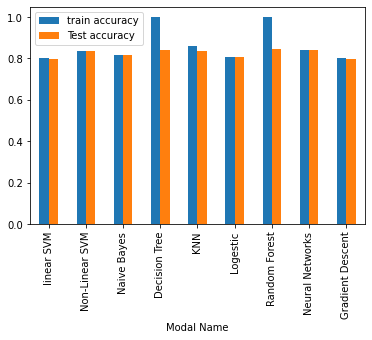

In [141]:
import matplotlib.pyplot as plt
com.plot(x="Modal Name", y=["train accuracy","Test accuracy"],kind="bar")

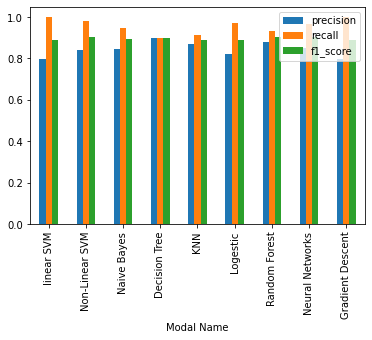

In [142]:
com.plot(x="Modal Name", y=["precision","recall","f1_score"],kind="bar")